**Author:** Rohan Venkatraman

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, levene, pearsonr, f_oneway, kruskal
import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.api as sm
import pingouin as pg
from statsmodels.formula.api import ols

In [4]:
flights = pd.read_csv("../Data_Files/Flights_Wrangled_Old.csv")
flights_train = pd.read_csv("../Data_Files/Flights_Train.csv")

C:\Users\rvenka23\AppData\Local\Temp\2\ipykernel_11800\1726155838.py:1: DtypeWarning: Columns (78,85) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("D:/Blue-04/Github/Data_Files/Flights_Wrangled_Old.csv")


In [9]:
airports = ["ATL", "DFW", "DEN", "ORD", "LAX", "CLT", "MCO", "LAS", "PHX", "MIA"]
airlines = ['AS', 'HA', 'G4', 'DL', 'UA', 'AA', 'NK', 'B6', 'F9', 'WN']
flights_airport = flights[(flights['Origin'].isin(airports))]

## Cancellations

### Airlines

In [4]:
tot_airline_flights = flights.groupby('IATA_Code_Operating_Airline').size()
airline_cancellations = flights[flights['Cancelled'] == 1].groupby('IATA_Code_Operating_Airline').size()
relative_airline_cancel = airline_cancellations / tot_airline_flights
relative_airline_cancel = relative_airline_cancel.sort_values(ascending=False)

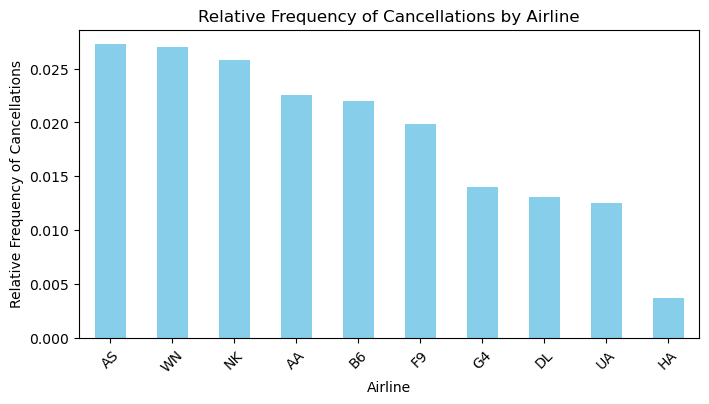

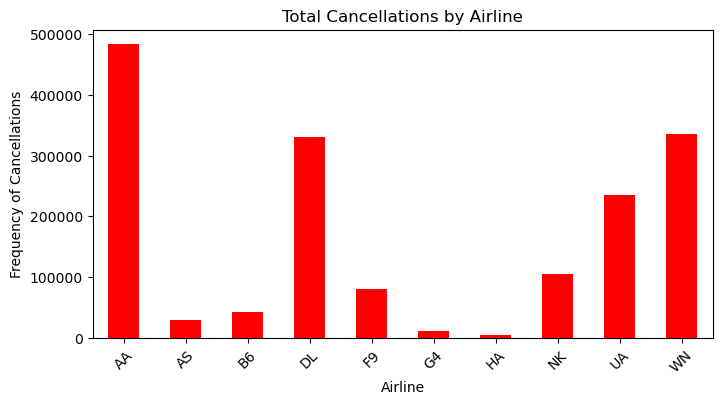

In [7]:
plt.figure(figsize=(8, 4))
relative_airline_cancel.plot(kind='bar', color='skyblue')
plt.title('Relative Frequency of Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Relative Frequency of Cancellations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
tot_airline_flights.plot(kind='bar', color='red')
plt.title('Total Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency of Cancellations')
plt.xticks(rotation=45)
plt.show()

### Airports

In [6]:
tot_airport_flights = flights_airport.groupby('Origin').size()
airport_cancellations = flights_airport[flights_airport['Cancelled'] == 1].groupby('Origin').size()
relative_airport_cancel = airport_cancellations / tot_airport_flights
relative_airport_cancel = relative_airport_cancel.sort_values(ascending=False)

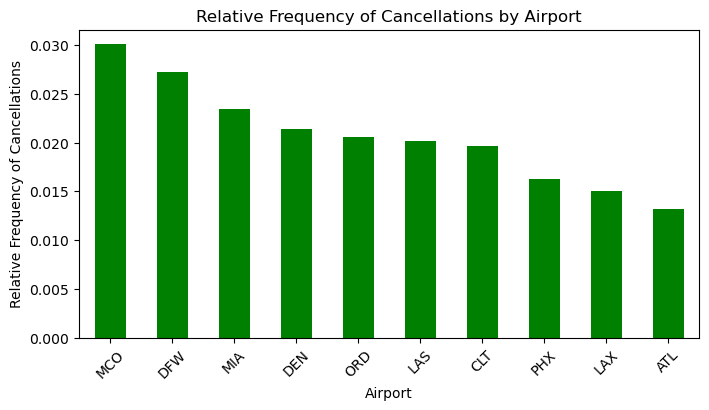

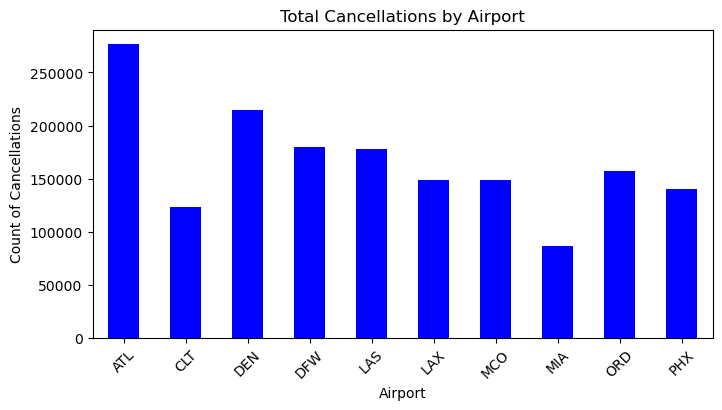

In [8]:
plt.figure(figsize=(8, 4))
relative_airport_cancel.plot(kind='bar', color='green')
plt.title('Relative Frequency of Cancellations by Airport')
plt.xlabel('Airport')
plt.ylabel('Relative Frequency of Cancellations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
tot_airport_flights.plot(kind='bar', color='blue')
plt.title('Total Cancellations by Airport')
plt.xlabel('Airport')
plt.ylabel('Count of Cancellations')
plt.xticks(rotation=45)
plt.show()

## Delays

### Airline

In [9]:
# Does not include early flights
airline_avg_delay = flights.groupby('IATA_Code_Operating_Airline')[['DepDelayMinutes', 'DepDelay', 'ArrDelayMinutes', 'ArrDelay']].mean()

# Flights that take off delayed but land early/on-time
airline_delay_ontime = flights[(flights['DepDelayMinutes'] > 0) & (flights['ArrDelayMinutes'] == 0)].groupby('IATA_Code_Operating_Airline').size()
airline_takeoff_delays = flights[flights['DepDelayMinutes'] > 0].groupby('IATA_Code_Operating_Airline').size()

freq_airline_delay_ontime = airline_delay_ontime / airline_takeoff_delays
freq_airline_delay_ontime = freq_airline_delay_ontime.sort_values(ascending=False)

# Flights that take off on-time but land delayed
airline_delay_ontime2 = flights[(flights['DepDelayMinutes'] == 0) & (flights['ArrDelayMinutes'] > 0)].groupby('IATA_Code_Operating_Airline').size()
airline_landing_delays = flights[flights['ArrDelayMinutes'] > 0].groupby('IATA_Code_Operating_Airline').size()

freq_airline_delay_ontime2 = airline_delay_ontime2 / airline_landing_delays
freq_airline_delay_ontime2 = freq_airline_delay_ontime2.sort_values(ascending=False)

<Figure size 1200x800 with 0 Axes>

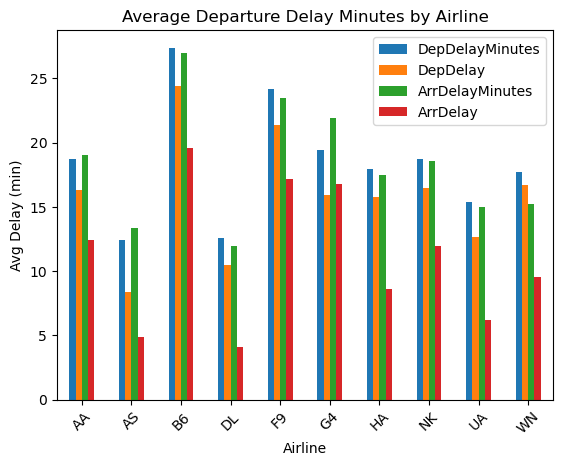

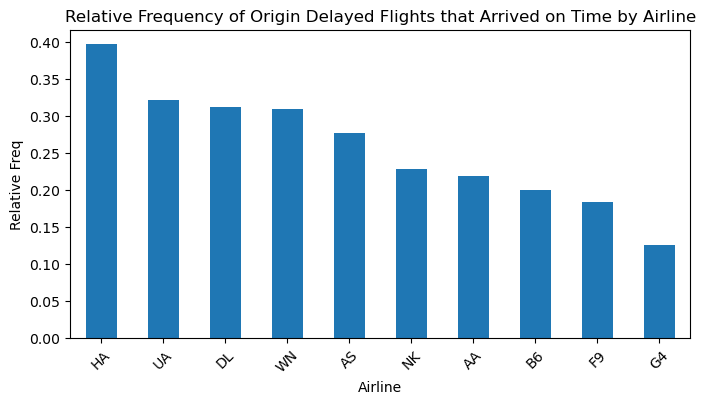

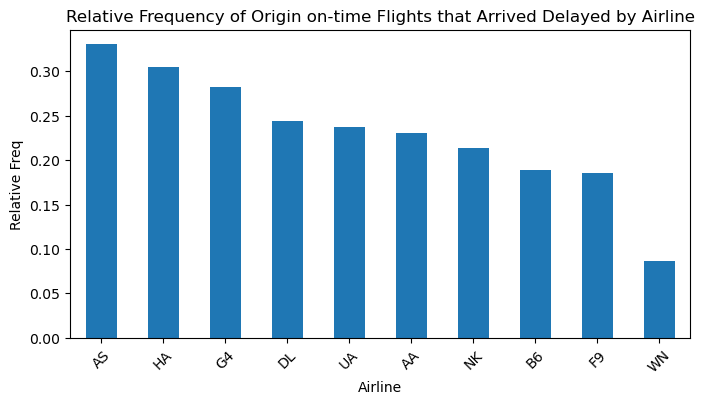

In [10]:
plt.figure(figsize=(12, 8))
airline_avg_delay.plot(kind='bar')
plt.title('Average Departure Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Avg Delay (min)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
freq_airline_delay_ontime.plot(kind='bar')
plt.title('Relative Frequency of Origin Delayed Flights that Arrived on Time by Airline')
plt.xlabel('Airline')
plt.ylabel('Relative Freq')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
freq_airline_delay_ontime2.plot(kind='bar')
plt.title('Relative Frequency of Origin on-time Flights that Arrived Delayed by Airline')
plt.xlabel('Airline')
plt.ylabel('Relative Freq')
plt.xticks(rotation=45)
plt.show()

### Airports

In [11]:
airline_origin_avg_delay = flights_airport.groupby('Origin')[['DepDelayMinutes', 'DepDelay']].mean()
# airline_dest_avg_delay = flights_airport.groupby('Dest')[['ArrDelayMinutes', 'ArrDelay']].mean()

<Figure size 800x400 with 0 Axes>

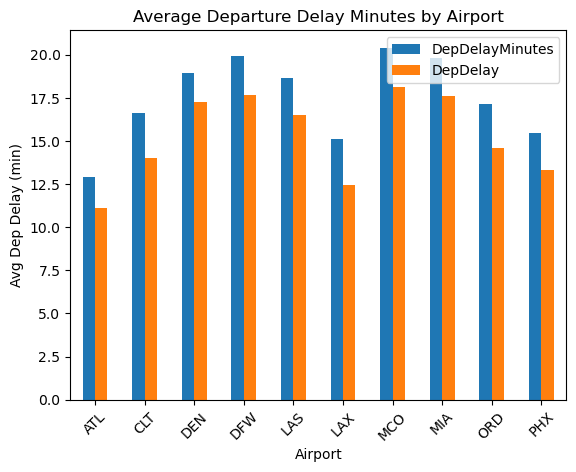

In [12]:
plt.figure(figsize=(8, 4))
airline_origin_avg_delay.plot(kind='bar')
plt.title('Average Departure Delay Minutes by Airport')
plt.xlabel('Airport')
plt.ylabel('Avg Dep Delay (min)')
plt.xticks(rotation=45)
plt.show()

# plt.figure(figsize=(8, 4))
# airline_dest_avg_delay.plot(kind='bar')
# plt.title('Average Arrival Delay Minutes by Airport')
# plt.xlabel('Airport')
# plt.ylabel('Avg Arrival Delay (min)')
# plt.xticks(rotation=45)
# plt.show()

## Distance & Delays

In [14]:
# Would use training set, but don't have old training set available
flights_distance_cleaned = flights.dropna(subset=['ArrDelay', 'Distance'])

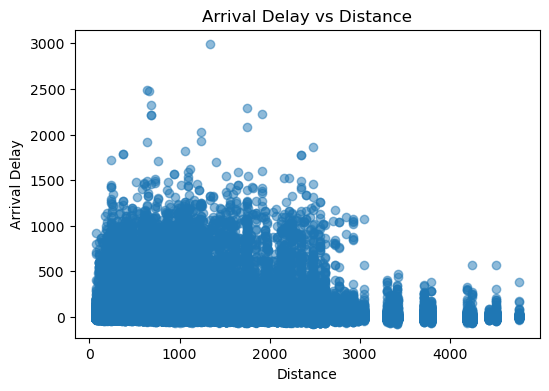

In [15]:
# See if there's relationship between arrival delay and distance
plt.figure(figsize=(6,4))
plt.scatter(flights_distance_cleaned['Distance'], flights_distance_cleaned['ArrDelay'], alpha=0.5)
plt.title('Arrival Delay vs Distance')
plt.xlabel('Distance')
plt.ylabel('Arrival Delay')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


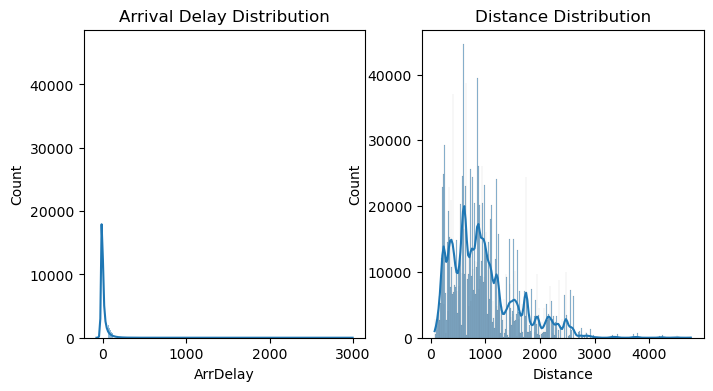

In [16]:
# See shape of arrival delay & distance distributions to prep for significance testing

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.histplot(flights_distance_cleaned['ArrDelay'].dropna(), kde=True)
plt.title('Arrival Delay Distribution')

plt.subplot(1, 2, 2)
sns.histplot(flights_distance_cleaned['Distance'].dropna(), kde=True)
plt.title('Distance Distribution')

plt.show()

In [17]:
# Get the correlation
corr, p_value = pearsonr(flights_distance_cleaned['ArrDelay'], flights_distance_cleaned['Distance'])
print(f'Correlation Coefficient {corr}')
print(f'P-Value {p_value}')

Correlation Coefficient -0.011881474278457867
P-Value 1.3915645084024634e-51


Distance and Arrival Delay do not show a relationship.

## ANOVA for Delay Times between Airlines
H0: Mean delay times is the same for all airlines

Levene's test p-value: 0.0000000000


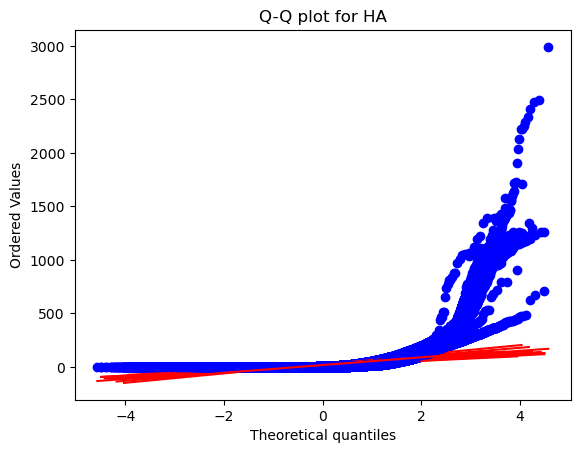

In [19]:
airlines = flights_train['Airline'].unique()
# Assume normality because of CLT
for a in airlines:
    probplot(flights_train[flights_train['Airline'] == a]['DepDelayMinutes'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {a}')
    #plt.show()

levene_test = levene(*[flights_train[flights_train['Airline'] == a]['DepDelayMinutes'].dropna() for a in airlines])
print(f"Levene's test p-value: {levene_test.pvalue:.10f}")

Skewed Distribution & non-constant variance - Use Kruskal Wallace

In [21]:
flights_kruskal = kruskal(*[flights_train[flights_train['Airline'] == a]['DepDelayMinutes'].dropna() for a in airlines])
print(f'Kruskal-Wallis test statistic: {flights_kruskal.statistic:.4f}')
print(f'Kruskal-Wallis test p-value: {flights_kruskal.pvalue:.20f}')

Kruskal-Wallis test statistic: 28758.6126
Kruskal-Wallis test p-value: 0.00000000000000000000


In [22]:
flights_posthoc = flights_train[['Airline', 'DepDelayMinutes']].dropna()
flights_dunn_test = sp.posthoc_dunn(flights_posthoc, val_col='DepDelayMinutes', group_col='Airline', p_adjust='bonferroni')
print(flights_dunn_test)

               AA             AS             B6            DL             F9  \
AA   1.000000e+00   5.850918e-80  3.068204e-190  0.000000e+00   0.000000e+00   
AS   5.850918e-80   1.000000e+00  1.570182e-264  1.000000e+00   0.000000e+00   
B6  3.068204e-190  1.570182e-264   1.000000e+00  0.000000e+00   1.000000e+00   
DL   0.000000e+00   1.000000e+00   0.000000e+00  1.000000e+00   0.000000e+00   
F9   0.000000e+00   0.000000e+00   1.000000e+00  0.000000e+00   1.000000e+00   
G4   1.000000e+00   1.293498e-26   2.758123e-37  4.077719e-35   1.053869e-37   
HA   3.193964e-02   8.943374e-03   1.126342e-33  3.804991e-03   4.925841e-33   
NK   1.431736e-26  2.043991e-116   4.777840e-83  0.000000e+00  9.266242e-112   
UA  1.118258e-158   7.951170e-13   0.000000e+00  1.742820e-67   0.000000e+00   
WN   0.000000e+00   0.000000e+00   3.493538e-89  0.000000e+00  3.817546e-172   

               G4            HA             NK             UA             WN  
AA   1.000000e+00  3.193964e-02   1.4317

Conclusion: There are significant differences between departure delays for all airlines

## 2-Way ANOVA: Differences in Self-Induced Delay Times

H0: There is no significant difference in the self-induced delay times among different airlines at different airports

Taking a look at all flights (instead of just delayed flights)

In [5]:
flights_delays = flights_train.copy()

In [6]:
flights_delays['TotalSelfInducedDelay'] = flights_delays['CarrierDelay'].fillna(0) + flights_delays['LateAircraftDelay'].fillna(0)

In [12]:
# for a in airlines:
#     for b in airports:
#         subset = flights_delays[(flights_delays['Airline'] == a) & (flights_delays['Origin'] == b)]['TotalSelfInducedDelay']
#         if len(subset) > 0:
#             stats.probplot(subset, dist="norm", plot=plt)
#             plt.title(f'QQ Plot for {a} at {b}')
#             plt.show()


In [14]:
flights_delays_mod = ols('TotalSelfInducedDelay ~ C(Airline) + C(Origin) + C(Airline)*C(Origin)', 
                         data=flights_delays).fit()

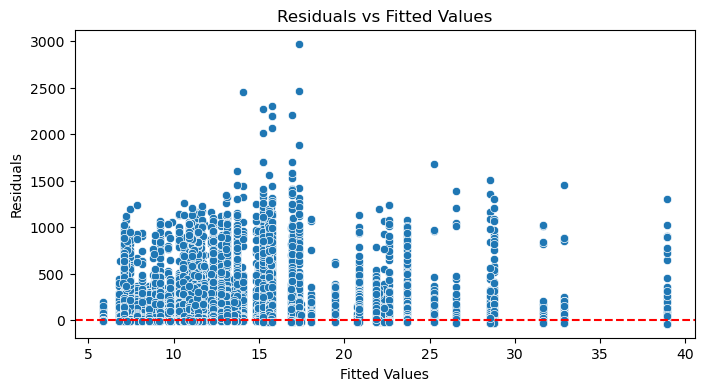

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=flights_delays_mod.fittedvalues, y=flights_delays_mod.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Variances are not constant

In [16]:
print(sm.stats.anova_lm(flights_delays_mod, type=2))

                            df        sum_sq        mean_sq           F  \
C(Airline)                 9.0  7.519097e+06  835455.263521  399.018810   
C(Origin)                  9.0  1.555601e+06  172844.582911   82.551685   
C(Airline):C(Origin)      81.0  3.501266e+06   43225.508143   20.644781   
Residual              972805.0  2.036834e+09    2093.774133         NaN   

                             PR(>F)  
C(Airline)             0.000000e+00  
C(Origin)             4.579599e-154  
C(Airline):C(Origin)  3.196458e-295  
Residual                        NaN  


In [17]:
flights_delays_robust = flights_delays_mod.get_robustcov_results(cov_type='HC3')
print(flights_delays_robust.summary())
temp_robust = flights_delays_robust.summary2().tables[1]
# Understand terms within model

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 99, but rank is 2
  warnings.warn('covariance of constraints does not have full '


                              OLS Regression Results                             
Dep. Variable:     TotalSelfInducedDelay   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                  0.006
Method:                    Least Squares   F-statistic:                    0.9149
Date:                   Fri, 26 Jul 2024   Prob (F-statistic):              0.401
Time:                           23:45:45   Log-Likelihood:            -5.1001e+06
No. Observations:                 972890   AIC:                         1.020e+07
Df Residuals:                     972805   BIC:                         1.020e+07
Df Model:                             84                                         
Covariance Type:                     HC3                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [18]:
anova_table_robust = sm.stats.anova_lm(flights_delays_robust, typ=2)
print(anova_table_robust)
# Understand significance of terms, interaction is not significant

                            sum_sq        df            F    PR(>F)
C(Airline)            7.269752e+07       9.0  3857.867287  0.000000
C(Origin)            -9.369417e+06       9.0  -497.210447  1.000000
C(Airline):C(Origin)  1.551695e+05      81.0     0.914938  0.400542
Residual              2.036834e+09  972805.0          NaN       NaN


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 2
  warnings.warn('covariance of constraints does not have full '


Investigate significance between airlines & airports separately in terms of self-induced delays

In [19]:
posthoc_self_delays = flights_delays[['Airline', 'Origin', 'TotalSelfInducedDelay']].dropna()
dunn_self_delays = sp.posthoc_dunn(posthoc_self_delays, val_col='TotalSelfInducedDelay', group_col='Airline', p_adjust='bonferroni')
dunn_self_delays2 = sp.posthoc_dunn(posthoc_self_delays, val_col='TotalSelfInducedDelay', group_col='Origin', p_adjust='bonferroni')
print(dunn_self_delays)

               AA             AS             B6             DL             F9  \
AA   1.000000e+00  1.498832e-129  3.299417e-137   0.000000e+00  3.478827e-220   
AS  1.498832e-129   1.000000e+00  1.491772e-282   1.000000e+00   0.000000e+00   
B6  3.299417e-137  1.491772e-282   1.000000e+00   0.000000e+00   1.000000e+00   
DL   0.000000e+00   1.000000e+00   0.000000e+00   1.000000e+00   0.000000e+00   
F9  3.478827e-220   0.000000e+00   1.000000e+00   0.000000e+00   1.000000e+00   
G4   7.876946e-06   3.230195e-67   6.701431e-11   1.252041e-90   3.154101e-10   
HA   6.161895e-04   1.141407e-04   3.163933e-31   1.479862e-05   1.280740e-30   
NK   2.945734e-84   6.395350e-32  2.557008e-247  5.935846e-116   0.000000e+00   
UA   0.000000e+00   7.742987e-07   0.000000e+00   8.030349e-41   0.000000e+00   
WN  3.000455e-129  5.871133e-238   4.786508e-43   0.000000e+00   2.442852e-62   

              G4            HA             NK            UA             WN  
AA  7.876946e-06  6.161895e-04 

In [20]:
print(dunn_self_delays2)

               ATL            CLT            DEN            DFW  \
ATL   1.000000e+00  2.410642e-202   0.000000e+00   0.000000e+00   
CLT  2.410642e-202   1.000000e+00   6.125566e-32   2.432657e-56   
DEN   0.000000e+00   6.125566e-32   1.000000e+00   1.746438e-05   
DFW   0.000000e+00   2.432657e-56   1.746438e-05   1.000000e+00   
LAS   0.000000e+00   3.215527e-33   1.000000e+00   1.668796e-03   
LAX   1.000000e+00  2.454154e-157   0.000000e+00   0.000000e+00   
MCO   0.000000e+00   7.286019e-28   1.000000e+00   2.949004e-04   
MIA  4.641815e-156   1.000000e+00   3.793900e-25   5.044676e-45   
ORD   9.157184e-61   3.316670e-40  4.433636e-177  5.239906e-224   
PHX  2.364885e-127   5.399927e-09   2.357196e-86  1.542003e-122   

               LAS            LAX            MCO            MIA  \
ATL   0.000000e+00   1.000000e+00   0.000000e+00  4.641815e-156   
CLT   3.215527e-33  2.454154e-157   7.286019e-28   1.000000e+00   
DEN   1.000000e+00   0.000000e+00   1.000000e+00   3.793900e-

#### One way Airline vs Self Induced Delay

In [22]:
mean_selfDelay = flights_delays.groupby('Airline')['TotalSelfInducedDelay'].mean()
print(mean_selfDelay)

Airline
AA    14.139710
AS     8.125823
B6    20.288795
DL     8.463854
F9    17.389874
G4    13.347510
HA    15.521432
NK    10.179239
UA    10.820263
WN    11.795012
Name: TotalSelfInducedDelay, dtype: float64


In [23]:
delays_corr, delays_p_value = pearsonr(flights_delays['CarrierDelay'].fillna(0), flights_delays['LateAircraftDelay'].fillna(0))
print(f'Correlation Coefficient {delays_corr}')
print(f'P-Value {delays_p_value}')

Correlation Coefficient 0.08563087907892214
P-Value 0.0


In [25]:
levene_test_selfDelay = levene(*[flights_delays[flights_delays['Airline'] == a]['TotalSelfInducedDelay'].dropna() for a in airlines])
print(f"Levene's test p-value: {levene_test_selfDelay.pvalue:.10f}")

Levene's test p-value: 0.0000000000


No normality or constant variance - Use Kruskal Wallace

In [26]:
selfdelay_kruskal = kruskal(*[flights_delays[flights_delays['Airline'] == a]['TotalSelfInducedDelay'].dropna() for a in airlines])
print(f'Kruskal-Wallis test statistic: {selfdelay_kruskal.statistic:.4f}')
print(f'Kruskal-Wallis test p-value: {selfdelay_kruskal.pvalue:.20f}')

Kruskal-Wallis test statistic: 12587.4634
Kruskal-Wallis test p-value: 0.00000000000000000000


In [27]:
selfdelay_posthoc = flights_delays[['Airline', 'TotalSelfInducedDelay']].dropna()
selfdelay_dunn_test = sp.posthoc_dunn(selfdelay_posthoc, val_col='TotalSelfInducedDelay', group_col='Airline', p_adjust='bonferroni')
print(selfdelay_dunn_test)

               AA             AS             B6             DL             F9  \
AA   1.000000e+00  1.498832e-129  3.299417e-137   0.000000e+00  3.478827e-220   
AS  1.498832e-129   1.000000e+00  1.491772e-282   1.000000e+00   0.000000e+00   
B6  3.299417e-137  1.491772e-282   1.000000e+00   0.000000e+00   1.000000e+00   
DL   0.000000e+00   1.000000e+00   0.000000e+00   1.000000e+00   0.000000e+00   
F9  3.478827e-220   0.000000e+00   1.000000e+00   0.000000e+00   1.000000e+00   
G4   7.876946e-06   3.230195e-67   6.701431e-11   1.252041e-90   3.154101e-10   
HA   6.161895e-04   1.141407e-04   3.163933e-31   1.479862e-05   1.280740e-30   
NK   2.945734e-84   6.395350e-32  2.557008e-247  5.935846e-116   0.000000e+00   
UA   0.000000e+00   7.742987e-07   0.000000e+00   8.030349e-41   0.000000e+00   
WN  3.000455e-129  5.871133e-238   4.786508e-43   0.000000e+00   2.442852e-62   

              G4            HA             NK            UA             WN  
AA  7.876946e-06  6.161895e-04 

##### Airports

In [28]:
levene_test_selfDelay2 = levene(*[flights_delays[flights_delays['Origin'] == a]['TotalSelfInducedDelay'].dropna() for a in airports])
print(f"Levene's test p-value: {levene_test_selfDelay2.pvalue:.10f}")

Levene's test p-value: 0.0000000000


In [30]:
selfdelay2_kruskal = kruskal(*[flights_delays[flights_delays['Origin'] == a]['TotalSelfInducedDelay'].dropna() for a in airports])
print(f'Kruskal-Wallis test statistic: {selfdelay2_kruskal.statistic:.4f}')
print(f'Kruskal-Wallis test p-value: {selfdelay2_kruskal.pvalue:.20f}')

Kruskal-Wallis test statistic: 6518.0297
Kruskal-Wallis test p-value: 0.00000000000000000000


## Self Induced Delays Univariate

In [32]:
flights_delays.groupby('Airline')['TotalSelfInducedDelay'].mean()

Airline
AA    14.139710
AS     8.125823
B6    20.288795
DL     8.463854
F9    17.389874
G4    13.347510
HA    15.521432
NK    10.179239
UA    10.820263
WN    11.795012
Name: TotalSelfInducedDelay, dtype: float64

In [33]:
flights_delays[flights_delays['TotalSelfInducedDelay'] > 0].groupby('Airline')['TotalSelfInducedDelay'].mean()

Airline
AA    64.885152
AS    57.642975
B6    72.239524
DL    60.106737
F9    61.483062
G4    53.567893
HA    84.575964
NK    54.632988
UA    68.815047
WN    47.061262
Name: TotalSelfInducedDelay, dtype: float64

In [34]:
flights_delays.groupby('Airline')['TotalSelfInducedDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
AA,283408.0,14.139710,55.644398,0.0,0.0,0.0,0.0,2991.0
AS,17167.0,8.125823,32.305509,0.0,0.0,0.0,0.0,901.0
B6,24810.0,20.288795,62.951406,0.0,0.0,0.0,13.0,1709.0
DL,195542.0,8.463854,40.492537,0.0,0.0,0.0,0.0,1178.0
F9,47069.0,17.389874,55.785726,0.0,0.0,0.0,13.0,1346.0
G4,6325.0,13.347510,45.908835,0.0,0.0,0.0,0.0,1341.0
HA,2403.0,15.521432,83.672022,0.0,0.0,0.0,0.0,1264.0
NK,61566.0,10.179239,38.708291,0.0,0.0,0.0,0.0,1271.0
UA,138886.0,10.820263,44.811183,0.0,0.0,0.0,0.0,1236.0


# Exploring Routes

In [35]:
flights_routes = flights_train.copy()

In [36]:
flights_routes['Route'] = flights_routes['Origin'] + '_' + flights_routes['Dest']

In [37]:
route_counts = flights_routes['Route'].value_counts().sort_values(ascending=False)

print(route_counts)

Route
LAX_JFK    6056
LAX_LAS    5710
ORD_LGA    5681
LAS_LAX    5651
DEN_LAS    5045
           ... 
CLT_JAC       1
LAX_SAN       1
CLT_AGS       1
DFW_GRB       1
MIA_SAV       1
Name: count, Length: 1027, dtype: int64


Top 5 Route Delays by Mean Delay Time

In [39]:
# Step 1: Calculate the average delay time for each route per airline
avg_route_delay = flights_routes.groupby(['Airline', 'Route'])['DepDelayMinutes'].mean().reset_index()

# Step 2: Identify the top 5 routes with the highest average delay for each airline
top_routes = avg_route_delay.sort_values(['Airline', 'DepDelayMinutes'], ascending=[True, False])
top_5_routes = top_routes.groupby('Airline').head(5)

table_data = [] 
for airline, group in top_5_routes.groupby('Airline'): 
    top_routes_list = group['Route'].tolist() 
    top_delays_list = group['DepDelayMinutes'].tolist() # Fill in the data for each airline 
    row = [airline] + [f"{route} ({delay:.1f})" for route, delay in zip(top_routes_list, top_delays_list)] 
    # Ensure each row has exactly 6 columns (1 for Airline and 5 for Top routes) 
    row += [None] * (6 - len(row)) 
    table_data.append(row) 
    
columns = ['Airline', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5'] 
top_routes_table = pd.DataFrame(table_data, columns=columns) 
print(top_routes_table)

  Airline             Top1            Top2            Top3            Top4  \
0      AA  PHX_IAD (453.0)  ORD_BTV (75.7)  MIA_CVG (58.0)  DFW_RAP (55.7)   
1      AS   LAX_RSW (34.7)  LAS_SJC (32.5)  LAX_TPA (21.0)  MCO_SFO (20.2)   
2      B6  LAS_BDL (109.4)  ATL_EWR (72.8)  LAX_AUS (67.9)  PHX_EWR (65.0)   
3      DL   PHX_PHL (45.7)  ATL_AGS (42.8)  DFW_BOS (33.8)  CLT_SLC (33.8)   
4      F9   ORD_ATL (93.6)  MIA_RDU (80.8)  MCO_MSP (77.8)  MCO_HSV (59.0)   
5      G4   LAS_GRR (59.3)  LAS_SDF (57.9)  DEN_AVL (49.7)  LAX_OKC (46.3)   
6      HA   PHX_HNL (31.7)  MCO_HNL (31.7)  LAX_HNL (26.7)  LAS_HNL (13.8)   
7      NK   ORD_OAK (56.0)  MCO_MSP (54.1)  MIA_MSP (47.7)  LAX_LGA (38.9)   
8      UA   DEN_ELP (35.3)  DEN_HDN (33.3)  DEN_BDL (32.8)  ATL_SFO (29.6)   
9      WN  MIA_PIT (445.0)  DEN_SRQ (39.0)  DEN_CLT (36.3)  DEN_BOS (35.1)   

             Top5  
0  MIA_SDF (49.1)  
1  LAX_LAS (19.6)  
2  LAS_EWR (51.4)  
3  LAX_MEM (29.9)  
4  ORD_DEN (58.4)  
5  PHX_PVU (41.6)  
6

In [40]:
# Extract routes without delay times and create a long-form DataFrame for easier analysis 
route_columns = ['Top1', 'Top2', 'Top3', 'Top4', 'Top5'] 
long_format = top_routes_table.melt(id_vars=['Airline'], value_vars=route_columns, var_name='Rank', value_name='Route')
long_format['Route'] = long_format['Route'].str.extract(r'(\w+_\w+)')

# Identify duplicate routes across different airlines 
duplicates = long_format.dropna().groupby('Route').filter(lambda x: len(x) > 1) 

# Print the matching routes along with the corresponding airlines 
for route, group in duplicates.groupby('Route'): 
    airlines = group['Airline'].tolist() 
    print(f"Route: {route}, Airlines: {', '.join(airlines)}")


Route: MCO_MSP, Airlines: NK, F9


Top 5 Route Delays by Count & Relative Freq

In [41]:
df_delayed = flights_routes[flights_routes['DepDelayMinutes'] > 0]

# Step 2: Calculate the count of delays for each route per airline
total_flights = flights_routes.groupby(['Airline', 'Route']).size().reset_index(name='TotalFlights')

# Step 3
delay_count = df_delayed.groupby(['Airline', 'Route']).size().reset_index(name='DelayCount')

# Step 4
merged = pd.merge(total_flights, delay_count, on=['Airline', 'Route'], how='left').fillna(0)

# Step 5: Calculate the relative frequency of delays
merged['RelativeFrequency'] = merged['DelayCount'] / merged['TotalFlights']
top_routes = merged.sort_values(['Airline', 'DelayCount'], ascending=[True, False])
top_5_routes = top_routes.groupby('Airline').head(5)

In [42]:
# Step 7: Create the table
# Create a DataFrame with one row per airline and columns for the top 5 routes
table_data = []
for airline, group in top_5_routes.groupby('Airline'):
    top_routes_list = group['Route'].tolist()
    top_freq_list = group['RelativeFrequency'].tolist()
    top_counts_list = group['DelayCount'].tolist()
    # Fill in the data for each airline
    row = [airline] + [f"{route} [{counts}] ({freq:.2f})" for route, counts, freq in zip(top_routes_list, top_counts_list, top_freq_list)]
    # Ensure each row has exactly 6 columns (1 for Airline and 5 for Top routes)
    row += [None] * (6 - len(row))
    table_data.append(row)


columns = ['Airline', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5']
top_routes_table = pd.DataFrame(table_data, columns=columns)

# Display the table
print(top_routes_table)

  Airline                     Top1                     Top2  \
0      AA  DFW_LAX [1275.0] (0.47)  DFW_LGA [1247.0] (0.49)   
1      AS   LAX_SEA [720.0] (0.37)   LAS_SEA [535.0] (0.36)   
2      B6  MCO_JFK [1002.0] (0.55)   LAX_JFK [862.0] (0.40)   
3      DL  ATL_MCO [1402.0] (0.47)  LAX_ATL [1353.0] (0.57)   
4      F9   MCO_PHL [631.0] (0.57)   DEN_LAS [504.0] (0.49)   
5      G4   LAS_FAT [149.0] (0.41)   LAS_SCK [134.0] (0.44)   
6      HA   LAX_HNL [327.0] (0.50)   LAS_HNL [310.0] (0.54)   
7      NK   MCO_SJU [600.0] (0.55)   ATL_FLL [512.0] (0.51)   
8      UA  DEN_IAH [1098.0] (0.52)  DEN_SFO [1039.0] (0.56)   
9      WN  DEN_PHX [1612.0] (0.71)  LAS_SAN [1478.0] (0.61)   

                      Top3                     Top4                     Top5  
0  ORD_LGA [1131.0] (0.43)  DFW_AUS [1127.0] (0.46)  DFW_MIA [1092.0] (0.57)  
1   PHX_SEA [516.0] (0.32)   ORD_SEA [433.0] (0.43)   DEN_SEA [383.0] (0.44)  
2   MCO_BOS [733.0] (0.53)   MCO_LGA [596.0] (0.58)   ATL_JFK [556.0]

In [43]:
# Step 5: Identify and print matching routes
# Extract routes without delay counts and create a long-form DataFrame for easier analysis
route_columns = ['Top1', 'Top2', 'Top3', 'Top4', 'Top5']
long_format = top_routes_table.melt(value_vars=route_columns, var_name='Rank', value_name='Route')
long_format['Airline'] = top_routes_table['Airline'].repeat(5).reset_index(drop=True)
long_format['Route'] = long_format['Route'].str.extract(r'(\w+_\w+)')

# Identify duplicate routes across different airlines
duplicates = long_format.dropna().groupby('Route').filter(lambda x: len(x) > 1)

# Print the matching routes along with the corresponding airlines
for route, group in duplicates.groupby('Route'):
    airlines = group['Airline'].tolist()
    print(f"Route: {route}, Airlines: {', '.join(airlines)}")


Route: ATL_FLL, Airlines: DL, UA
Route: DEN_LAS, Airlines: B6, G4
Route: LAS_SAN, Airlines: DL, NK
Route: MCO_SJU, Airlines: AS, HA
